# 데이터사이언스융합학과 2024710658 박창준

## 데이터 불러오기

In [1]:
import pandas as pd
# 데이터 읽어오기 
df = pd.read_csv('./twitter_validation.csv',header=None)

C:\Dev\miniconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
df

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


### 라이브러리 불러오기

In [4]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pattern.en import sentiment as pattern_sentiment

In [5]:
# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cjpar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjpar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cjpar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# 불용어 및 표제어 추출기 설정
stop_words = set(stopwords.words('english'))

additional_stop_words = {'u', 'im'}  # 추가할 불용어 목록
stop_words.update(additional_stop_words)

lemmatizer = WordNetLemmatizer()

## 데이터 EDA 및 전처리

### 1. 데이터 형태 확인

In [7]:
df.shape

(1000, 4)

### 2. column명 바꾸기

In [8]:
# column명 바꾸기
df.rename(columns={2:'sentiment', 3:'text'}, inplace=True)

### 3. drop column

In [9]:
df.drop(columns=[0, 1], inplace=True)

In [10]:
df

,sentiment,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


### 4. 데이터 전처리 적용

In [11]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    # 소문자 변환
    text = text.lower()
    # URL 제거
    text = re.sub(r'http\S+|www\S+|https\S+|\S+\.com\S*', '', text)
    # 정규식을 사용하여 pic.twitter.com으로 시작하는 모든 패턴 제거
    text = re.sub(r'\bpic\.twitter\.com\S*', '', text)
    # 멘션 제거
    text = re.sub(r'@\w+', '', text)
    # 해시태그 제거
    text = re.sub(r'#\w+', '', text)
    # HTML 태그 제거
    text = BeautifulSoup(text, "html.parser").get_text()
    # 특수 문자 제거
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # 숫자 제거
    text = re.sub(r'\d+', '', text)
    # 공백 제거
    text = text.strip()
    # 단어 토큰화
    words = word_tokenize(text)
    # 불용어 제거 및 표제어 추출
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # 단어들을 다시 하나의 문자열로 결합
    text = ' '.join(words)
    return text

In [12]:
# 전처리 적용
df['processed_text'] = df['text'].apply(preprocess_text)

In [13]:
# 전처리 과정에서 모든 문장이 삭제될 가능성이 있으므로, 해당 데이터 제거

print("공백 제거 전 훈련 데이터 개수: ", len(df))
train_not_empty_value = df["processed_text"] != ""
df = df[train_not_empty_value]
print("공백 제거 후 훈련 데이터 개수: ", len(df))

공백 제거 전 훈련 데이터 개수:  1000
공백 제거 후 훈련 데이터 개수:  998


In [14]:
# 순서 변경
df = df.sample(frac=1).reset_index(drop=True)
df

,sentiment,text,processed_text
0,Positive,finally completed assassin's creed odyssey so ...,finally completed assassin creed odyssey come ...
1,Negative,Nice bug @Rainbow6Game pic.twitter.com/MeOpHhpA7D,nice bug
2,Positive,Seeing Amazon Prime marketing Borat by getting...,seeing amazon prime marketing borat getting ti...
3,Neutral,Praise and Shame for Facebook mockpaperscissor...,praise shame facebook
4,Positive,This is fantastic!,fantastic
...,...,...,...
993,Neutral,Ending season 3 by stealing someone else's kil...,ending season stealing someone el kill elimina...
994,Positive,Thank you \n For wanting me to stay home and p...,thank wanting stay home play fifa
995,Irrelevant,Sound ON! Enjoy the groove and this little mon...,sound enjoy groove little montage made tribute...
996,Neutral,Shitting around | Borderlands 3 | Part 5.5 twi...,shitting around borderland part twitchtvslayerbot


### 5. 데이터 중복 확인 및 제거

 - 중복 데이터의 수

In [15]:
duplicate_count = df.duplicated(keep=False).sum()
duplicate_count

2

In [16]:
# 중복된 'text' 컬럼의 인덱스를 구합니다.
duplicate_indexes = df[df.duplicated(keep=False)].index
duplicate_indexes

Index([521, 872], dtype='int64')

 - 중복 데이터그룹 확인

In [17]:
# 중복된 데이터 그룹화하여 개수 확인
duplicate_counts = df.groupby(df.columns.tolist()).size().reset_index(name='count')
duplicate_counts = duplicate_counts[duplicate_counts['count'] > 1]  # 중복된 행만 필터링

# 중복된 데이터 개수가 높은 순으로 정렬
duplicate_counts_sorted = duplicate_counts.sort_values(by='count', ascending=False)

display(duplicate_counts_sorted)

,sentiment,text,processed_text,count
953,Positive,Wow,wow,2


 - 중복제거

In [18]:
# # 중복된 인덱스를 사용하여 해당 행을 삭제합니다.
# df.drop(duplicate_indexes, inplace=True)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(997, 3)

### 6. 결측치 확인 및 제거

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 997
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sentiment       997 non-null    object
 1   text            997 non-null    object
 2   processed_text  997 non-null    object
dtypes: object(3)
memory usage: 31.2+ KB


In [22]:
df.isnull().sum()

sentiment         0
text              0
processed_text    0
dtype: int64

### 7. 이상치 분석(과도하게 많이 반복되는 단어 분석)

In [23]:
from collections import Counter

# 모든 텍스트 데이터를 하나의 문자열로 합치기
all_text = ' '.join(df['processed_text'])

# 단어의 빈도수 계산
word_counts = Counter(all_text.split())

# 이상치 찾기
outliers = []
for word, count in word_counts.items():
    # 이상치로 간주할 조건 설정 (예: 빈도수가 너무 낮은 경우)
    if count >= 45:
        outliers.append((word, count))

# 이상치 출력 (count 값 기준으로 내림차순 정렬)
outliers_sorted = sorted(outliers, key=lambda x: x[1], reverse=True)

print("단어와 반복출현 횟수 :")
for word, count in outliers_sorted:
    print(f"Word: {word}, Count: {count}")

단어와 반복출현 횟수 :
Word: game, Count: 139
Word: like, Count: 80
Word: get, Count: 69
Word: johnson, Count: 63
Word: love, Count: 57
Word: one, Count: 51
Word: good, Count: 50
Word: play, Count: 48
Word: time, Count: 47
Word: cant, Count: 47
Word: new, Count: 46
Word: dont, Count: 46
Word: make, Count: 46
Word: best, Count: 45


### 7. 텍스트 길이 분포 확인

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 텍스트 길이 분포 확인
length_x = df['processed_text'].apply(len)
print("텍스트 길이 통계:")
print(length_x.describe())

텍스트 길이 통계:
count    997.000000
mean      70.160481
std       47.691827
min        3.000000
25%       32.000000
50%       59.000000
75%      100.000000
max      249.000000
Name: processed_text, dtype: float64


### 8. 라벨별 텍스트 길이 히스토그램

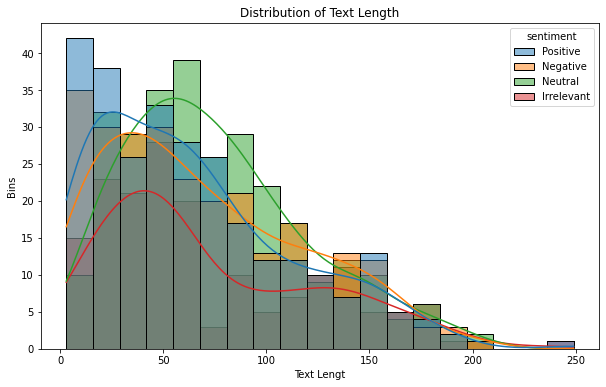

In [25]:
# 라벨별 텍스트 길이 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x= length_x, hue= 'sentiment', kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Text Lengt")
plt.ylabel("Bins")
plt.show()

### 9. value_counts()를 통해 actual sentiment분포 확인

In [26]:
# actual sentiment 값의 분포 확인
sentiment_distribution = df['sentiment'].value_counts()
sentiment_distribution

sentiment
Neutral       284
Positive      276
Negative      265
Irrelevant    172
Name: count, dtype: int64

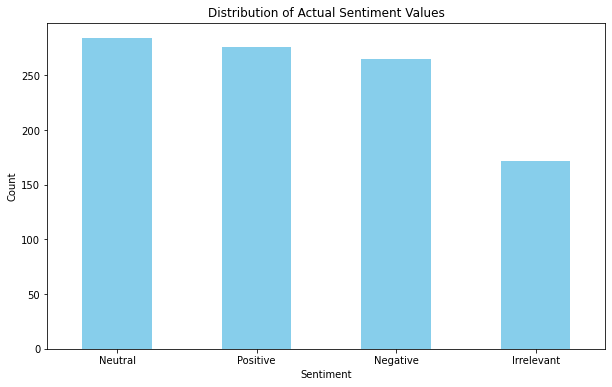

In [27]:
# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sentiment_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Actual Sentiment Values')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### 10. Irrelevant 제거

In [28]:
# 실제 sentiment가 "Irrelevant"가 아닌 데이터만 남긴다.
df = df.loc[df['sentiment'] != 'Irrelevant']

In [29]:
# actual sentiment 값의 분포 확인
sentiment_distribution = df['sentiment'].value_counts()
sentiment_distribution

sentiment
Neutral     284
Positive    276
Negative    265
Name: count, dtype: int64

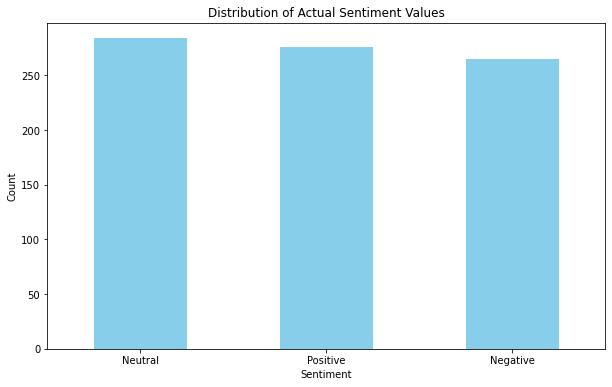

In [30]:
# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sentiment_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Actual Sentiment Values')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [31]:
df.shape

(825, 3)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 997
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sentiment       825 non-null    object
 1   text            825 non-null    object
 2   processed_text  825 non-null    object
dtypes: object(3)
memory usage: 25.8+ KB


## 모델링

### 1. TextBlob 적용

In [33]:
# TextBlob을 사용한 감정 분석 함수 정의
def analyze_sentiment_textblob(text):
    blob = TextBlob(text) # TextBliob 객체생성
    return blob.sentiment.polarity # sentiment.polarity 점수 반환 

# 감정 분석 결과를 저장할 새로운 컬럼 생성
df['textblob_sentiment'] = df['processed_text'].apply(analyze_sentiment_textblob)

### 2. VADER 적용

In [34]:
# import random

# # VADER 감정 분석기 초기화
# vader_analyzer = SentimentIntensityAnalyzer()

# # VADER 감정 분석 함수
# def analyze_sentiment_vader(text):
#     sentences = text.split('.')
#     sentiment_score = 0
#     for sentence in sentences:
#         sentiment_score += vader_analyzer.polarity_scores(sentence)['compound']
#     return sentiment_score / len(sentences)

# # 강조 단어 처리 함수
# def emphasize_words(text):
#     words = text.split()
#     for i in range(len(words)):
#         if random.random() > 0.8:
#             words[i] = words[i].upper()
#     return ' '.join(words)

# # 데이터 증강 적용 (강조 단어)
# df['emphasized_text'] = df['processed_text'].apply(emphasize_words)

# # 감정 분석 적용
# df['vader_sentiment'] = df['emphasized_text'].apply(analyze_sentiment_vader)

In [35]:
def analyze_sentiment_vader(text):
    vader_analyzer = SentimentIntensityAnalyzer()
    return vader_analyzer.polarity_scores(text)['compound']

df['vader_sentiment'] = df['processed_text'].apply(analyze_sentiment_vader)

### 3. Pattern 적용

In [36]:
from pattern.en import sentiment as pattern_sentiment

# 사용자 정의 사전
custom_sentiments = {
    'cant': -0.5, 'love': 0.8, 'shit': -1.0, 'good': 0.8, 'dont': -0.5,
    'like': 0.8, 'fucking': -1.0, 'fuck': -1.0, 'legend': 1.0, 'need': -0.6,
    'bad': -0.8, 'never': -0.7, 'thanks': 0.8, 'right': 0.5
}

# Pattern 감정 분석 함수
def analyze_sentiment_pattern(text):
    words = text.split() # 입력된 텍스트를 공백을 기준으로 단어 단위로 분할
    polarity = 0  # 값 초기화
    subjectivity = 0 # 값 초기화
    
    # words에 저장된 단어 수만큼 반복
    for word in words:
        if word in custom_sentiments: # 사용자 정의 사전 안에 해당 단어가 있다면
            pol, subj = custom_sentiments[word], 0.5 # 해당 단어의 점수를 polarity 점수로 사용()
                                                     # 해당 단어의 Subjectivity 점수는 0.5로 고정
        else: # # 사용자 정의 사전 안에 해당 단어가 없다면
            pol, subj = pattern_sentiment(word) # pattern_sentiment함수를 통해 점수 추출
        polarity += pol # polarity 값 누적
        subjectivity += subj # subjectivity 값 누적
    return polarity / len(words) # polarity

# 감정 분석 적용
df['pattern_sentimen'] = df['processed_text'].apply(analyze_sentiment_pattern)

## 결과 분석

### Accuracy 성능 비교

### 1. TextBlob

In [37]:
# 3진 감성 레이블로 변환하는 함수
def th_textblob(score):
    if score > 0.005:
        return "Positive"
    elif score < -0.005:
        return "Negative"
    else:
        return "Neutral"

In [38]:
df['textblob_trinary'] = df['textblob_sentiment'].apply(th_textblob)

In [39]:
textblob_accuracy = (df['textblob_trinary'] == df['sentiment']).mean()

In [40]:
print(f"TextBlob Accuracy: {textblob_accuracy:.9f}")

TextBlob Accuracy: 0.470303030


### 2. VADER

In [41]:
# 3진 감성 레이블로 변환하는 함수
def th_vader(score):
    if score > 0.051:
        return "Positive"
    elif score < -0.051:
        return "Negative"
    else:
        return "Neutral"

In [42]:
df['vader_trinary'] = df['vader_sentiment'].apply(th_vader)

In [43]:
vader_accuracy = (df['vader_trinary'] == df['sentiment']).mean()

In [44]:
print(f"VADER Accuracy: {vader_accuracy:.9f}")

VADER Accuracy: 0.492121212


### 3. Pattern

In [45]:
# 3진 감성 레이블로 변환하는 함수
def th_pattern(score):
    if score > 0.033:
        return "Positive"
    elif score < -0.026:
        return "Negative"
    else:
        return "Neutral"

In [46]:
df['pattern_trinary'] = df['pattern_sentimen'].apply(th_pattern)

In [47]:
pattern_accuracy = (df['pattern_trinary'] == df['sentiment']).mean()

In [48]:
# 성능 비교 결과 출력
print(f"Pattern Accuracy: {pattern_accuracy:.9f}")

Pattern Accuracy: 0.495757576


### 점수분석

In [49]:
df.describe()

,textblob_sentiment,vader_sentiment,pattern_sentimen
count,825.000000,825.000000,825.000000
mean,0.037435,0.073309,0.007939
std,0.360826,0.560571,0.150330
min,-1.000000,-0.943200,-1.000000
25%,-0.160000,-0.476700,-0.047826
50%,0.000000,0.000000,0.000000
75%,0.250000,0.599400,0.066667
max,1.000000,0.967000,0.800000


In [50]:
# 성능 비교 결과 출력
print(f"TextBlob Accuracy: {textblob_accuracy:.5f}")
print(f"VADER Accuracy: {vader_accuracy:.5f}")
print(f"Pattern Accuracy: {pattern_accuracy:.5f}")

TextBlob Accuracy: 0.47030
VADER Accuracy: 0.49212
Pattern Accuracy: 0.49576
